<a href="https://colab.research.google.com/github/Prathamesh326/Analyse-Deaths-involving-Police-in-the-United-States/blob/main/Fatal_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
# Displaying updated inspection results
inspection_results = {
    "Median Household Income": {
        "Shape": df_hh_income.shape,
        "Columns": df_hh_income.columns.tolist(),
        "Nulls": df_hh_income.isnull().sum()
    },
    "Poverty Levels": {
        "Shape": df_pct_poverty.shape,
        "Columns": df_pct_poverty.columns.tolist(),
        "Nulls": df_pct_poverty.isnull().sum()
    },
    "High School Completion": {
        "Shape": df_pct_completed_hs.shape,
        "Columns": df_pct_completed_hs.columns.tolist(),
        "Nulls": df_pct_completed_hs.isnull().sum()
    },
    "Racial Distribution by City": {
        "Shape": df_share_race_city.shape,
        "Columns": df_share_race_city.columns.tolist(),
        "Nulls": df_share_race_city.isnull().sum()
    },
    "Fatal Force Data": {
        "Shape": df_fatalities.shape,
        "Columns": df_fatalities.columns.tolist(),
        "Nulls": df_fatalities.isnull().sum()
    },
}

In [ ]:
inspection_results

{'Median Household Income': {'Shape': (29322, 3),
  'Columns': ['Geographic Area', 'City', 'Median Income'],
  'Nulls': Geographic Area     0
  City                0
  Median Income      51
  dtype: int64},
 'Poverty Levels': {'Shape': (29329, 3),
  'Columns': ['Geographic Area', 'City', 'poverty_rate'],
  'Nulls': Geographic Area    0
  City               0
  poverty_rate       0
  dtype: int64},
 'High School Completion': {'Shape': (29329, 3),
  'Columns': ['Geographic Area', 'City', 'percent_completed_hs'],
  'Nulls': Geographic Area         0
  City                    0
  percent_completed_hs    0
  dtype: int64},
 'Racial Distribution by City': {'Shape': (29268, 7),
  'Columns': ['Geographic area',
   'City',
   'share_white',
   'share_black',
   'share_native_american',
   'share_asian',
   'share_hispanic'],
  'Nulls': Geographic area          0
  City                     0
  share_white              0
  share_black              0
  share_native_american    0
  share_asian     

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
# Replacing missing values with 0 in all datasets
df_hh_income.fillna(0, inplace=True)
df_pct_poverty.fillna(0, inplace=True)
df_pct_completed_hs.fillna(0, inplace=True)
df_share_race_city.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)

In [ ]:
# Dropping duplicate rows
df_hh_income.drop_duplicates(inplace=True)
df_pct_poverty.drop_duplicates(inplace=True)
df_pct_completed_hs.drop_duplicates(inplace=True)
df_share_race_city.drop_duplicates(inplace=True)
df_fatalities.drop_duplicates(inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
# Clean the poverty_rate column
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')

<ipython-input-54-268a15fb685f>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




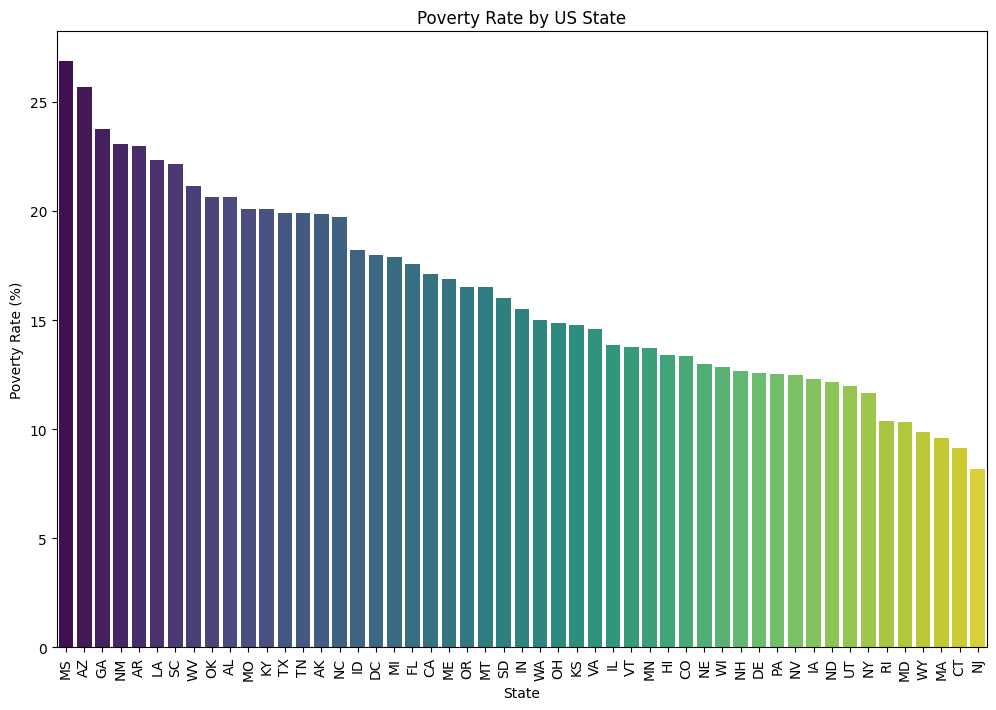

In [ ]:
# Aggregating poverty rates by state
poverty_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)

# Plotting bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=poverty_by_state.index, y=poverty_by_state.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Poverty Rate by US State")
plt.ylabel("Poverty Rate (%)")
plt.xlabel("State")
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
state_hs_grad = df_pct_completed_hs.dropna(subset=['percent_completed_hs'])

<ipython-input-56-af705a8f5602>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




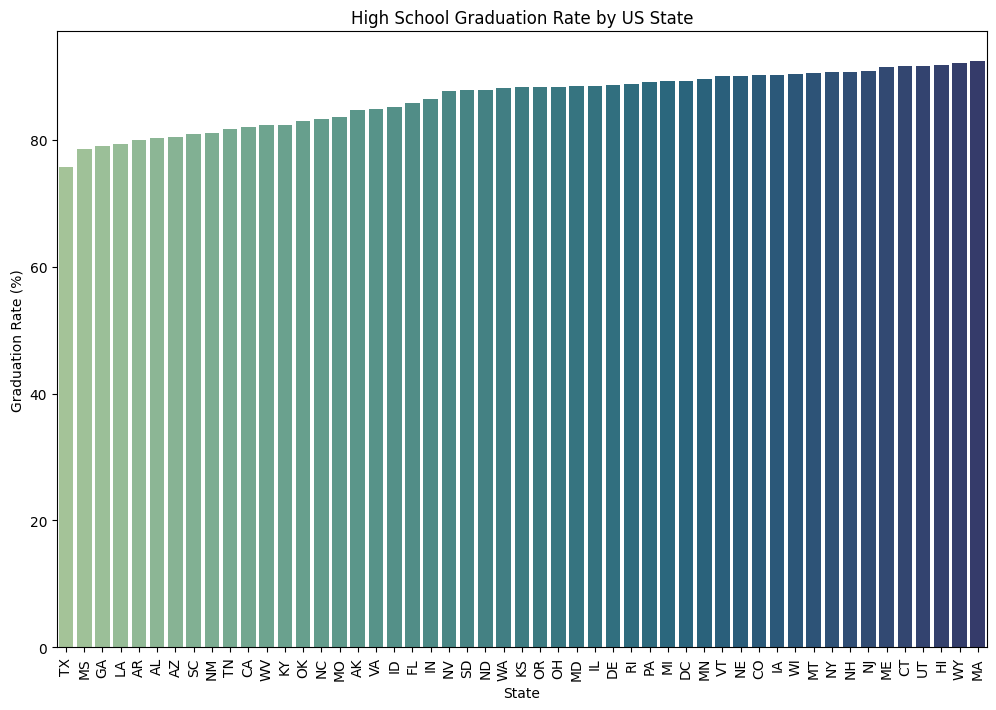

In [ ]:
state_hs_grad = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=state_hs_grad.index, y=state_hs_grad.values, palette="crest")
plt.xticks(rotation=90)
plt.title("High School Graduation Rate by US State")
plt.ylabel("Graduation Rate (%)")
plt.xlabel("State")
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
combined = pd.merge(df_pct_poverty, df_pct_completed_hs, on=['Geographic Area', 'City'])

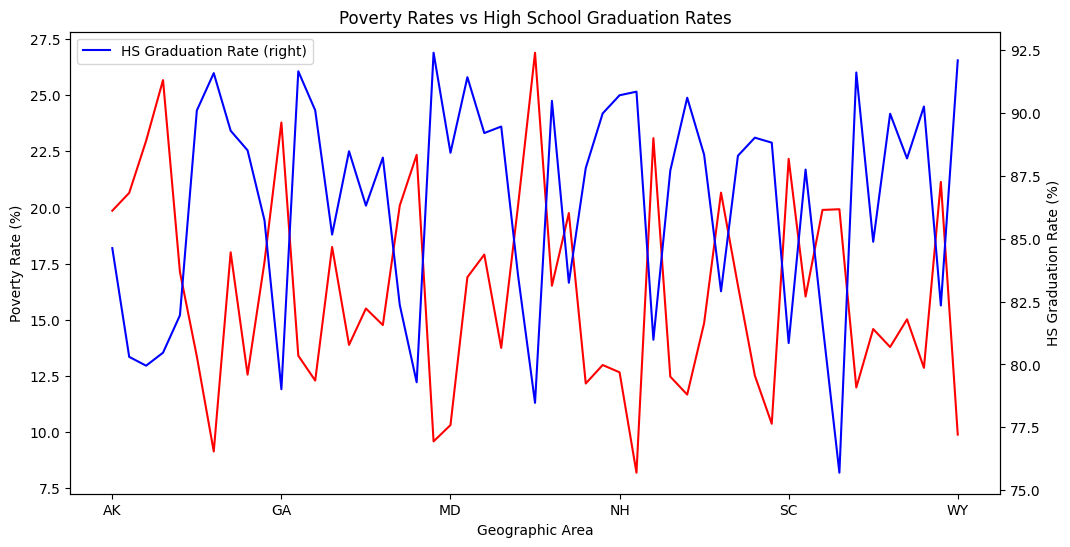

In [ ]:
plt.figure(figsize=(12, 6))
ax = combined.groupby('Geographic Area')['poverty_rate'].mean().plot(label="Poverty Rate", color="red")
combined.groupby('Geographic Area')['percent_completed_hs'].mean().plot(label="HS Graduation Rate", secondary_y=True, color="blue")
ax.set_ylabel("Poverty Rate (%)")
plt.ylabel("HS Graduation Rate (%)")
plt.title("Poverty Rates vs High School Graduation Rates")
plt.legend(loc="upper left")
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

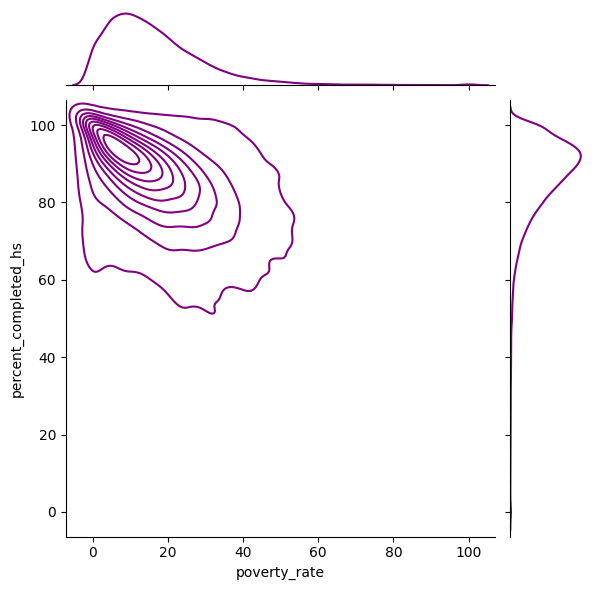

In [ ]:
sns.jointplot(data=combined, x="poverty_rate", y="percent_completed_hs", kind="kde", color="purple")
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

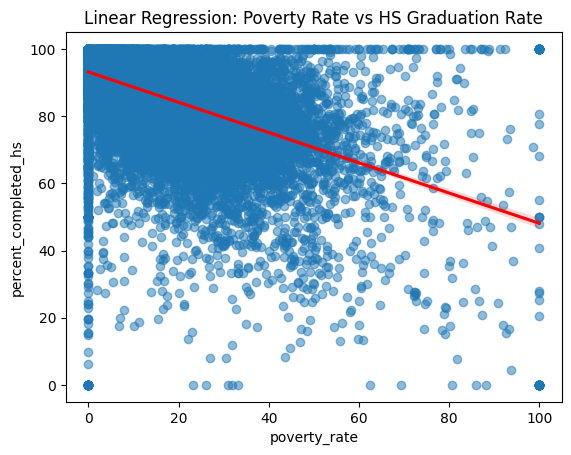

In [ ]:
sns.regplot(data=combined, x="poverty_rate", y="percent_completed_hs", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Linear Regression: Poverty Rate vs HS Graduation Rate")
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
df_share_race_city[["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]] = df_share_race_city[["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]].apply(pd.to_numeric, errors='coerce')

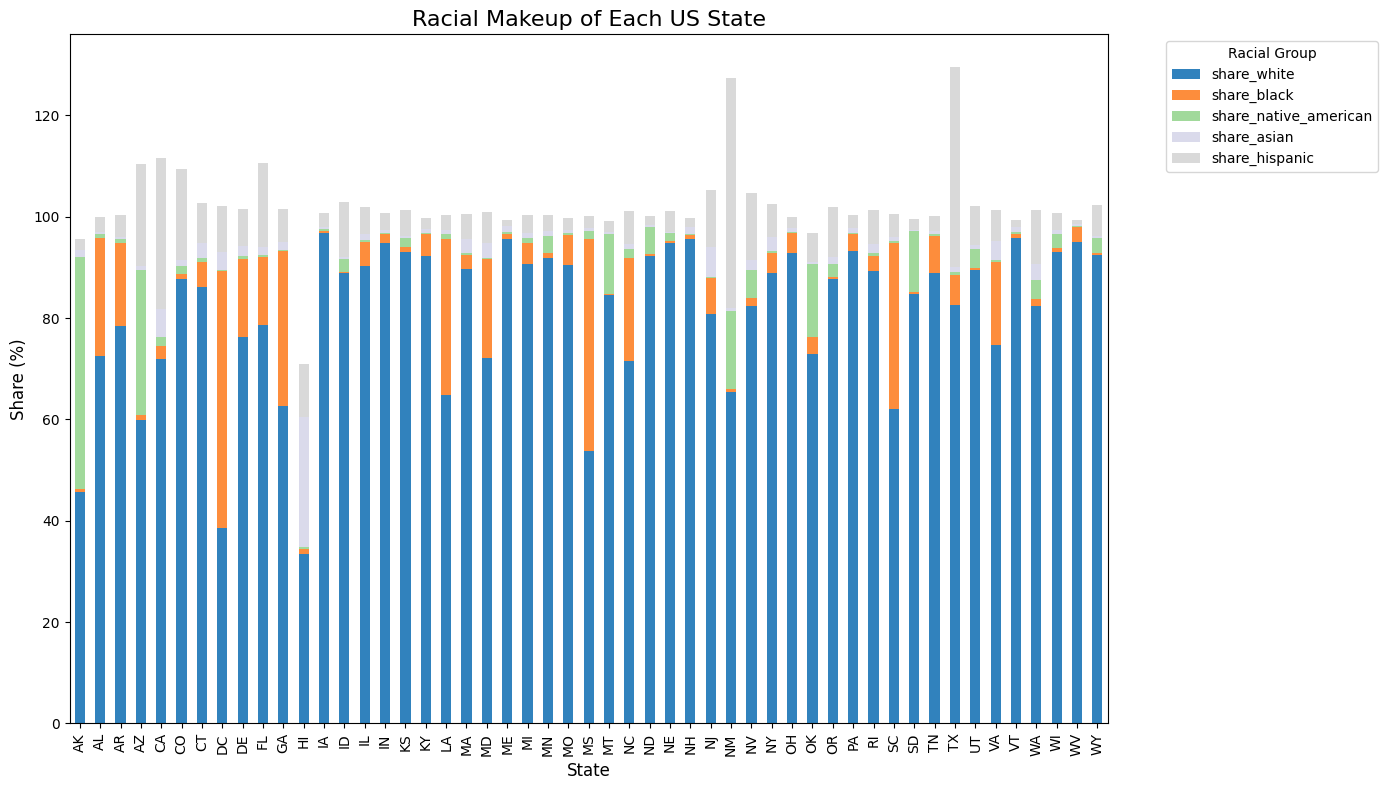

In [ ]:
# Group by state and calculate the mean racial shares
race_by_state = df_share_race_city.groupby("Geographic area")[["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]].mean()

# Plot the stacked bar chart
race_by_state.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="tab20c")
plt.title("Racial Makeup of Each US State", fontsize=16)
plt.ylabel("Share (%)", fontsize=12)
plt.xlabel("State", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Racial Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
race_counts = df_fatalities['race'].value_counts()

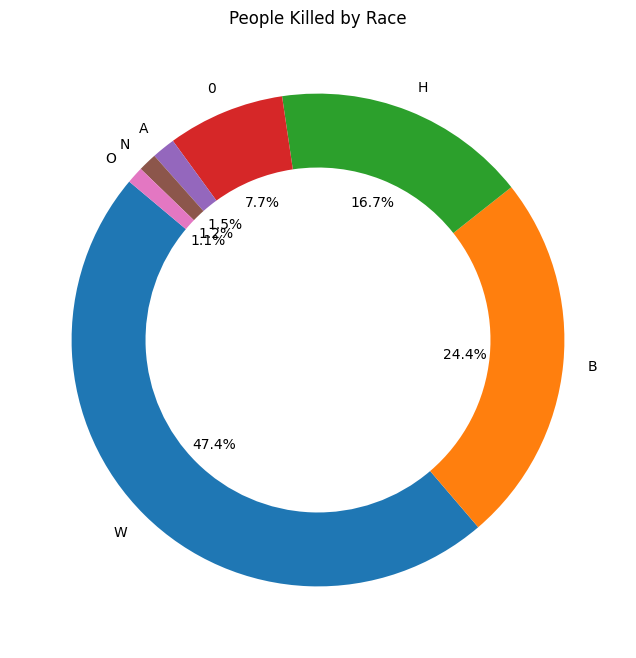

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title("People Killed by Race")
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [ ]:
gender_counts = df_fatalities['gender'].value_counts()

<ipython-input-67-892a7607085b>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




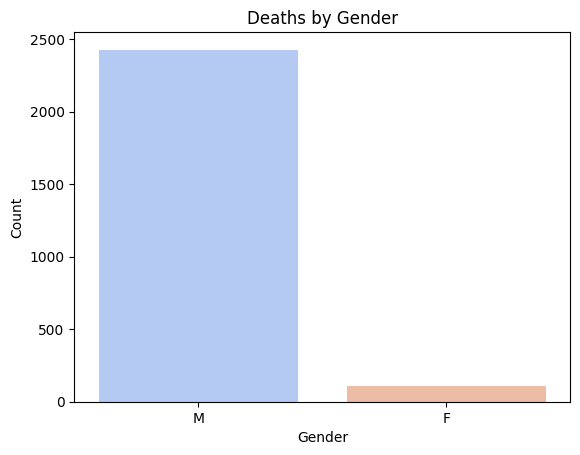

In [ ]:
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="coolwarm")
plt.title("Deaths by Gender")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [ ]:
# Data preparation: remove rows with missing or invalid ages
df_fatalities = df_fatalities.dropna(subset=['age', 'gender', 'manner_of_death'])

# Ensure age is numeric
df_fatalities['age'] = pd.to_numeric(df_fatalities['age'], errors='coerce')
df_fatalities = df_fatalities.dropna(subset=['age'])

<Axes: xlabel='manner_of_death', ylabel='age'>

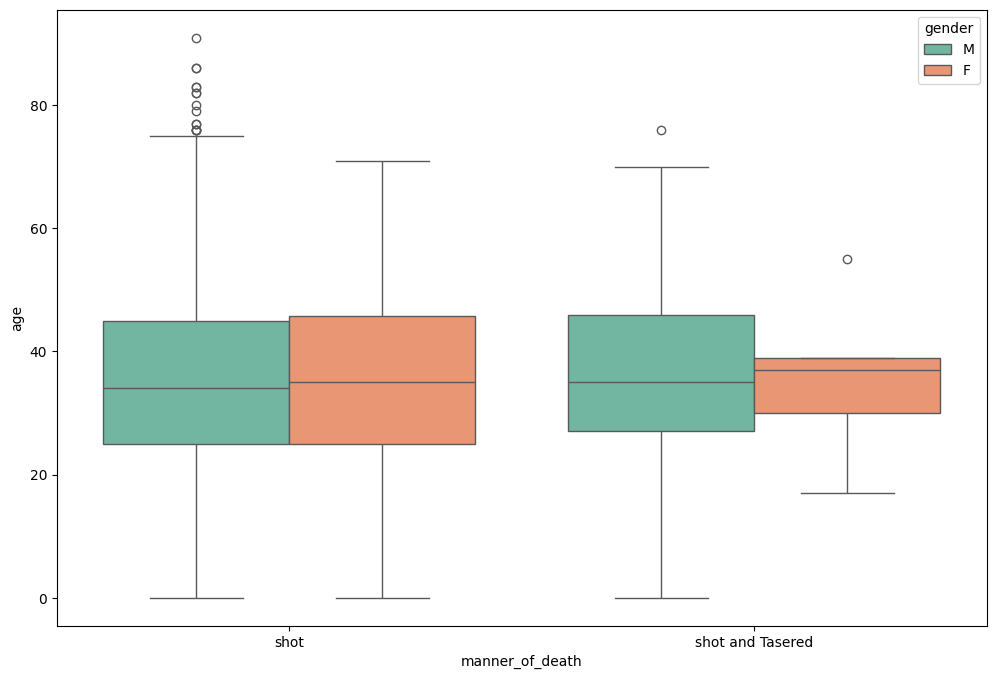

In [ ]:
# Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='manner_of_death',
    y='age',
    hue='gender',
    data=df_fatalities,
    palette='Set2'
)

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
# Ensure 'armed' column is properly formatted
df_fatalities['armed'] = df_fatalities['armed'].str.lower().fillna('unarmed')

# Categorize 'armed' status
armed_status = df_fatalities['armed'].apply(lambda x: 'armed' if x != 'unarmed' and x != 'unknown' else 'unarmed')

# Calculate percentages
armed_counts = armed_status.value_counts(normalize=True) * 100

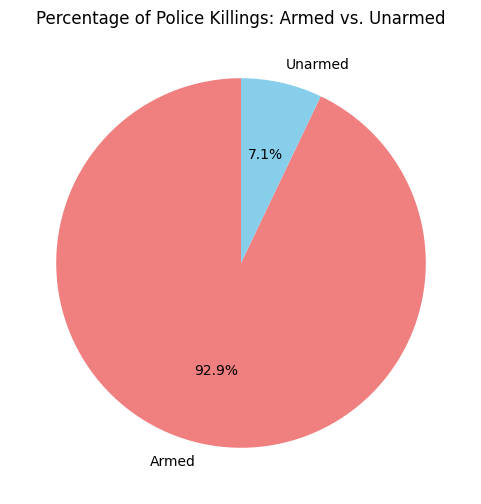

In [ ]:
# Plot pie chart for armed/unarmed status
plt.figure(figsize=(6, 6))
armed_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'], labels=['Armed', 'Unarmed'])
plt.title("Percentage of Police Killings: Armed vs. Unarmed")
plt.ylabel("")
plt.show()

<ipython-input-72-8e94f759196e>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




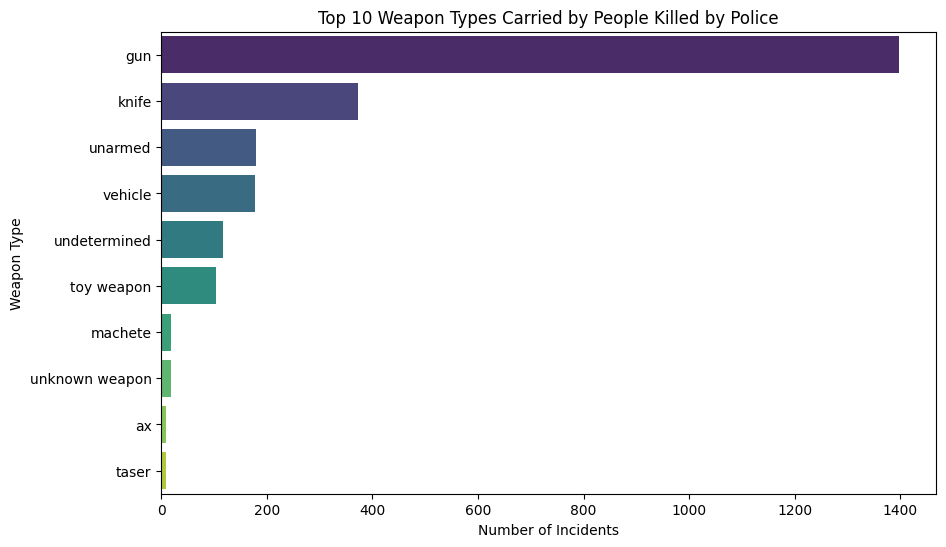

In [ ]:
# Break down weapon types
weapon_counts = df_fatalities['armed'].value_counts().head(10)  # Top 10 weapon types

# Plot horizontal bar chart for weapon types
plt.figure(figsize=(10, 6))
sns.barplot(x=weapon_counts.values, y=weapon_counts.index, palette="viridis")
plt.title("Top 10 Weapon Types Carried by People Killed by Police")
plt.xlabel("Number of Incidents")
plt.ylabel("Weapon Type")
plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
df_fatalities['age'] = pd.to_numeric(df_fatalities['age'], errors='coerce')
df_fatalities = df_fatalities.dropna(subset=['age'])
total_fatalities = len(df_fatalities)
under_25 = df_fatalities[df_fatalities['age'] < 25]
percentage_under_25 = (len(under_25) / total_fatalities) * 100

print(f"Percentage of people killed under 25 years old: {percentage_under_25:.2f}%")

Percentage of people killed under 25 years old: 20.79%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

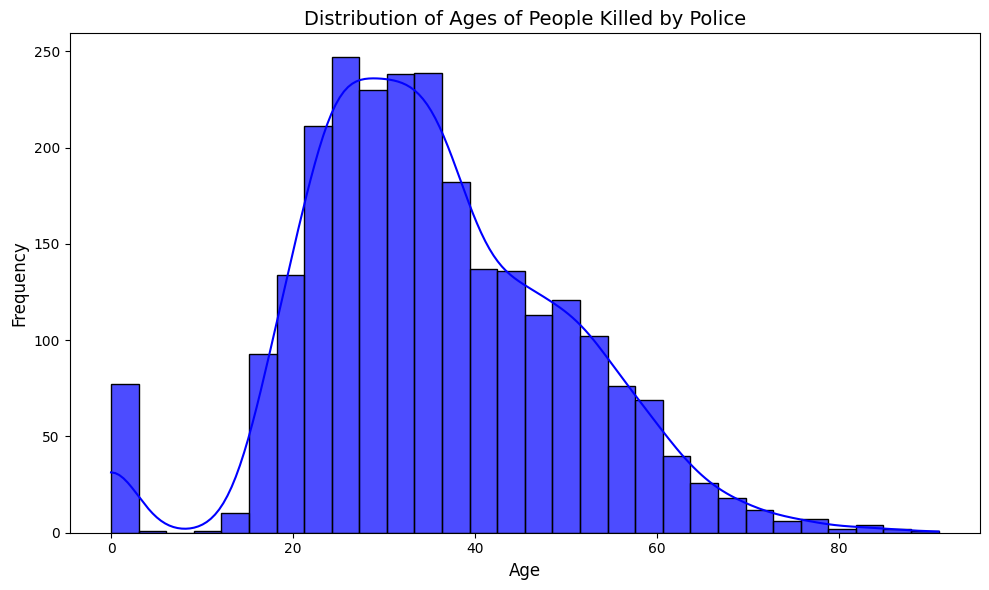

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Histogram with KDE
sns.histplot(df_fatalities['age'], kde=True, bins=30, color='blue', alpha=0.7)

# Add titles and labels
plt.title("Distribution of Ages of People Killed by Police", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

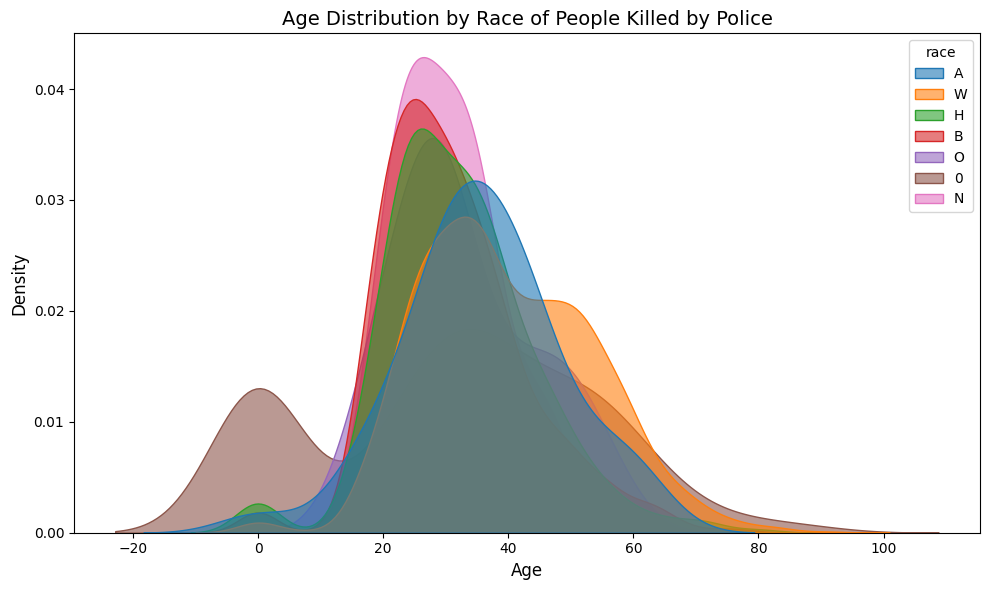

In [ ]:
# Filter out rows where race is missing or unknown
df_fatalities = df_fatalities[df_fatalities['race'].notna()]

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a separate KDE plot for each race
sns.kdeplot(data=df_fatalities, x='age', hue='race', fill=True, common_norm=False, palette='tab10', alpha=0.6)

# Add titles and labels
plt.title("Age Distribution by Race of People Killed by Police", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [ ]:
# Count the total number of people killed by race
race_counts = df_fatalities['race'].value_counts()

<ipython-input-77-e2283e2b9814>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




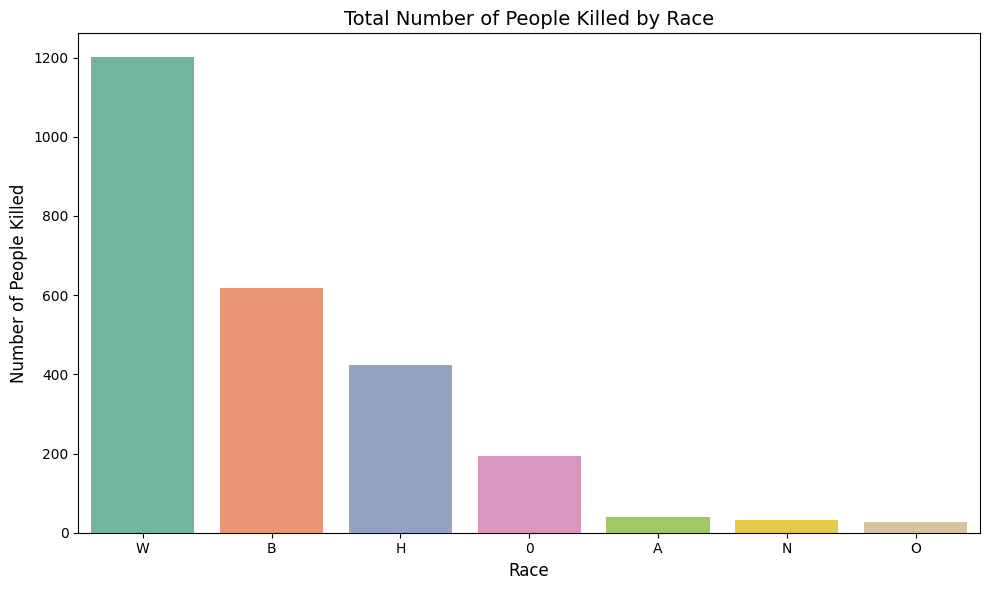

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Create a bar chart for the total number of people killed by race
sns.barplot(x=race_counts.index, y=race_counts.values, palette="Set2")

# Add titles and labels
plt.title("Total Number of People Killed by Race", fontsize=14)
plt.xlabel("Race", fontsize=12)
plt.ylabel("Number of People Killed", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
# Count the total number of people killed
total_killings = df_fatalities.shape[0]

# Count the number of people with signs of mental illness (assuming 'Yes' indicates mental illness)
mental_illness_count = df_fatalities[df_fatalities['signs_of_mental_illness'] == 'Yes'].shape[0]

# Calculate the percentage
mental_illness_percentage = (mental_illness_count / total_killings) * 100

# Display the result
print(f"Percentage of people killed by police with signs of mental illness: {mental_illness_percentage:.2f}%")


Percentage of people killed by police with signs of mental illness: 0.00%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

<ipython-input-79-3f32fafd284c>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




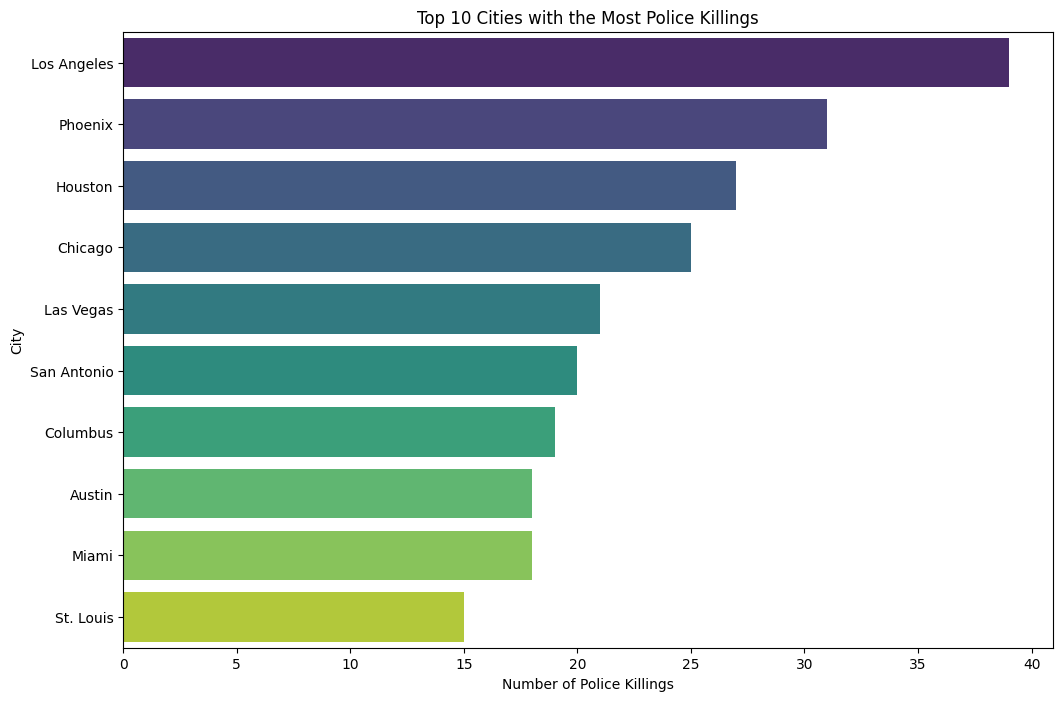

In [ ]:
# Group by 'city' and count the number of killings
city_killings = df_fatalities['city'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=city_killings.values, y=city_killings.index, palette="viridis")
plt.title("Top 10 Cities with the Most Police Killings")
plt.xlabel("Number of Police Killings")
plt.ylabel("City")
plt.show()


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [ ]:
# Step 1: Get the top 10 cities with the most police killings
top_10_cities = df_fatalities['city'].value_counts().head(10).index

In [ ]:
# Step 2: Filter the data to include only the top 10 cities
df_top_10_cities = df_fatalities[df_fatalities['city'].isin(top_10_cities)]

In [ ]:
# Step 3: Calculate the racial breakdown for each city in the top 10
# First, group by city and race, then calculate the percentage
race_by_city = df_top_10_cities.groupby(['city', 'race']).size().unstack(fill_value=0)
race_share = race_by_city.divide(race_by_city.sum(axis=1), axis=0) * 100  # Calculate percentage share

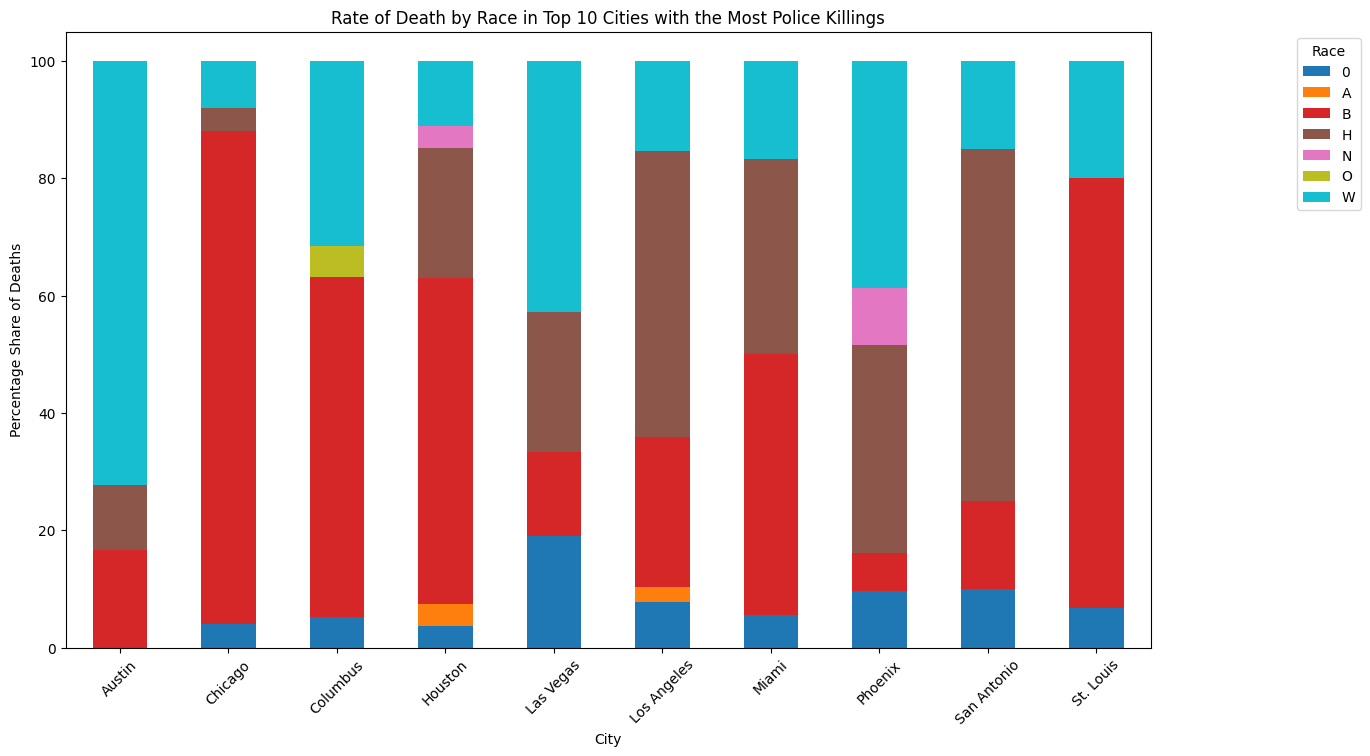

In [ ]:
# Step 4: Visualize the rate of death by race for the top 10 cities
race_share.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="tab10")
plt.title("Rate of Death by Race in Top 10 Cities with the Most Police Killings")
plt.ylabel("Percentage Share of Deaths")
plt.xlabel("City")
plt.legend(title='Race', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=45)
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
state_killings = df_fatalities['state'].value_counts()

fig = px.choropleth(locations=state_killings.index, locationmode="USA-states", color=state_killings.values,
                    scope="usa", color_continuous_scale="Reds", title="Police Killings by State")
fig.show()


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [ ]:
# Step 1: Convert the 'date' or 'incident_date' column to datetime format
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], errors='coerce')

<ipython-input-85-eb86076fcda5>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
# Step 2: Extract the year from the date column and create a 'year' column
df_fatalities['year'] = df_fatalities['date'].dt.year

In [ ]:
# Step 3: Group the data by year and count the number of incidents (police killings)
killings_by_year = df_fatalities.groupby('year')['id'].count()

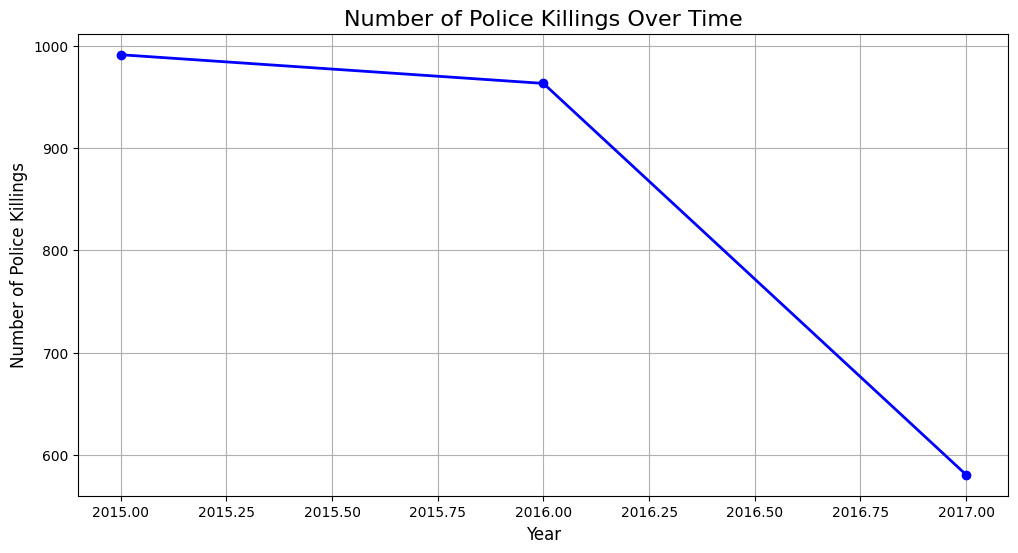

In [ ]:
# Step 4: Plot the trend of police killings over time
plt.figure(figsize=(12, 6))
plt.plot(killings_by_year.index, killings_by_year.values, marker='o', color='b', linestyle='-', linewidth=2)
plt.title("Number of Police Killings Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Police Killings", fontsize=12)
plt.grid(True)
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).